In [33]:

file = r'https://raw.githubusercontent.com/clueple/free_resources/master/sample_data.csv'

In [34]:
from pandas import read_csv, to_datetime
import numpy as np

from matplotlib import pyplot as plt 

In [35]:
df = read_csv(file)
df['Date'] = to_datetime(df['Date'], format='%Y-%m-%d')
df.tail()

,Date,Open,High,Low,Close,Volume
3067,2022-01-25,24203.0,24358.0,23996.0,24238.0,169458
3068,2022-01-26,24428.0,24477.0,24121.0,24317.0,141282
3069,2022-01-27,24100.0,24100.0,23569.0,23840.0,119772
3070,2022-01-28,23900.0,23909.0,23549.0,23612.0,6968
3071,2022-01-31,23585.0,23958.0,23426.0,23862.0,59520


In [36]:
df = df.set_index('Date')
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-25,24203.0,24358.0,23996.0,24238.0,169458
2022-01-26,24428.0,24477.0,24121.0,24317.0,141282
2022-01-27,24100.0,24100.0,23569.0,23840.0,119772
2022-01-28,23900.0,23909.0,23549.0,23612.0,6968
2022-01-31,23585.0,23958.0,23426.0,23862.0,59520


In [37]:
# 20=day moving average of 'Close'
df['sma'] = df['Close'].rolling(window=20).mean()
# std of 'Close' for the past 20 days
df['std'] = df['Close'].rolling(window=20).std()
# upper band is sma + 2* std
df['ub'] = df['sma'] + (2*(df['std']))
#lower band is sma - 2* std
df['lb'] = df['sma'] - (2*(df['std']))

In [38]:
df = df.dropna()

df.tail()

,Open,High,Low,Close,Volume,sma,std,ub,lb
Date,,,,,,,,,
2022-01-25,24203.0,24358.0,23996.0,24238.0,169458,23860.40,653.468672,25167.337344,22553.462656
2022-01-26,24428.0,24477.0,24121.0,24317.0,141282,23922.95,632.978213,25188.906426,22656.993574
2022-01-27,24100.0,24100.0,23569.0,23840.0,119772,23959.05,604.606830,25168.263659,22749.836341
2022-01-28,23900.0,23909.0,23549.0,23612.0,6968,23967.10,598.527658,25164.155317,22770.044683
2022-01-31,23585.0,23958.0,23426.0,23862.0,59520,23996.90,576.204268,25149.308535,22844.491465


In [39]:
gdf = df[-180:]

In [40]:
plot_line = gdf[['Close', 'sma', 'ub', 'lb']]

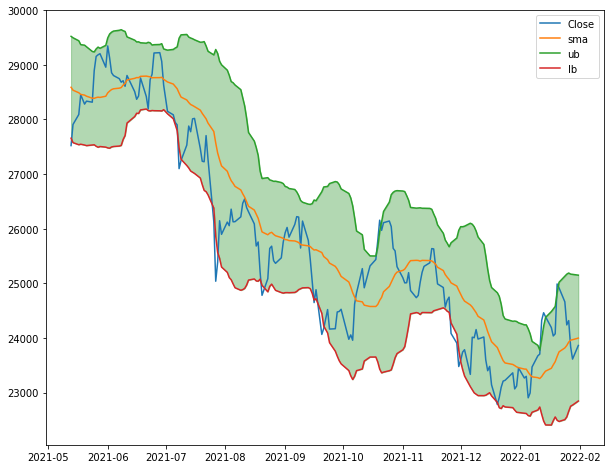

In [41]:
height = 10
weight = 8

plt.rcParams['figure.figsize']=[height, weight]
plt.plot(plot_line)
plt.fill_between(gdf.index, gdf['ub'], gdf['lb'] , color='green', alpha=0.3)
plt.legend(plot_line)
plt.show()
